In [2]:
import tensorflow as tf
import numpy as np
def load_and_preprocess_data():
    # Load MNIST dataset
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
    
    # Normalize pixel values
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    
    # Reshape images to 1D arrays
    x_train = x_train.reshape(-1, 32*32*3)
    x_test = x_test.reshape(-1, 32*32*3)
    
    # One-hot encode labels
    y_train = tf.keras.utils.to_categorical(y_train, 10)
    y_test = tf.keras.utils.to_categorical(y_test, 10)
    
    return (x_train, y_train), (x_test, y_test)

(xtrain, ytrain), (xtest, ytest) = load_and_preprocess_data()


170498071/170498071 [==============================] - 254s 1us/step


In [4]:
xtrain.shape

(50000, 3072)

In [5]:
ytrain.shape

(50000, 10)

In [18]:
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(3072, activation='relu', input_shape=(3072,)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1028, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    
    return model
model = create_model()


In [19]:
def train(model, x_train, y_train, x_test, y_test):
    # Train the model
    history = model.fit(x_train, y_train,
                       batch_size=128,
                       epochs=20,
                       validation_split=0.2,
                       verbose=1)
    return history
model_history = train(model, xtrain,ytrain,xtest, ytest)

Epoch 1/20
313/313 [==============================] - 3s 7ms/step - loss: 2.1321 - accuracy: 0.1957 - val_loss: 1.9400 - val_accuracy: 0.2825
Epoch 2/20
313/313 [==============================] - 2s 6ms/step - loss: 1.9101 - accuracy: 0.2969 - val_loss: 1.8529 - val_accuracy: 0.3262
Epoch 3/20
313/313 [==============================] - 2s 6ms/step - loss: 1.8385 - accuracy: 0.3321 - val_loss: 1.7924 - val_accuracy: 0.3463
Epoch 4/20
313/313 [==============================] - 2s 6ms/step - loss: 1.7987 - accuracy: 0.3464 - val_loss: 1.7295 - val_accuracy: 0.3749
Epoch 5/20
313/313 [==============================] - 2s 6ms/step - loss: 1.7667 - accuracy: 0.3582 - val_loss: 1.7265 - val_accuracy: 0.3789
Epoch 6/20
313/313 [==============================] - 2s 6ms/step - loss: 1.7368 - accuracy: 0.3721 - val_loss: 1.6994 - val_accuracy: 0.3957
Epoch 7/20
313/313 [==============================] - 2s 6ms/step - loss: 1.7145 - accuracy: 0.3833 - val_loss: 1.6732 - val_accuracy: 0.4074
Epoch 

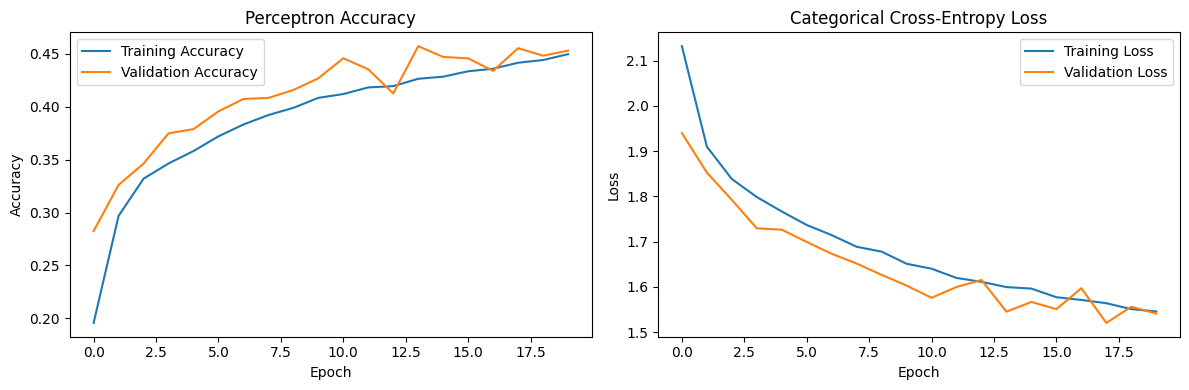

In [22]:
import matplotlib.pyplot as plt
def plot_training_history(history): 
    plt.figure(figsize=(12, 4)) 
    # Plot accuracy 
    plt.subplot(1, 2, 1) 
    plt.plot(history.history['accuracy'], label='Training Accuracy') 
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy') 
    plt.title('Perceptron Accuracy') 
    plt.xlabel('Epoch') 
    plt.ylabel('Accuracy') 
    plt.legend() 
    # Plot loss 
    plt.subplot(1, 2, 2) 
    plt.plot(history.history['loss'], label='Training Loss') 
    plt.plot(history.history['val_loss'], label='Validation Loss') 
    plt.title('Categorical Cross-Entropy Loss') 
    plt.xlabel('Epoch') 
    plt.ylabel('Loss') 
    plt.legend() 
    plt.tight_layout() 
    plt.show() 
plot_training_history(model_history)


In [23]:
# Predict probabilities
ypred = model.predict(xtest)

# Convert probabilities to class labels
ypred_classes = np.argmax(ypred, axis=1)

# Convert one-hot encoded labels to class labels
ytest_classes = np.argmax(ytest, axis=1)

# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(ytest_classes, ypred_classes))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.57      0.51      0.54      1000
           1       0.56      0.57      0.56      1000
           2       0.31      0.30      0.31      1000
           3       0.31      0.33      0.32      1000
           4       0.39      0.37      0.38      1000
           5       0.42      0.33      0.37      1000
           6       0.42      0.65      0.51      1000
           7       0.61      0.41      0.49      1000
           8       0.58      0.60      0.59      1000
           9       0.50      0.55      0.52      1000

    accuracy                           0.46     10000
   macro avg       0.47      0.46      0.46     10000
weighted avg       0.47      0.46      0.46     10000



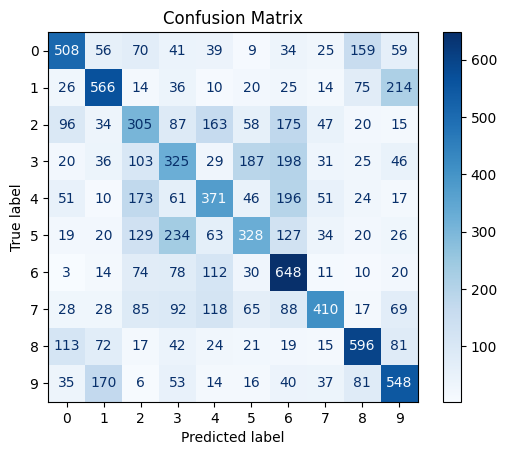

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(ytest_classes, ypred_classes)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()